The **beta-binomial** can be written as

$$
y_i \sim Bin(\theta_i, n_i)
$$
$$
\theta_i \sim Beta(\alpha, \beta)
$$

The **posterior distribution** is approximately equivalent to

$$
p(\theta, \alpha, \beta|y) \propto p(\alpha, \beta) \times p(\theta | \alpha, \beta) \times p( y| \theta, \alpha, \beta)
$$

The **beta distribution** has the form

$$
p(\theta) = \frac{\Gamma(\alpha + \beta}{\Gamma(\alpha)\times \Gamma(\beta)}\theta^{\alpha -1}(1 - \theta)^{\beta - 1}
$$

The second half of the joint posterior distribution, $ p(y|\theta, \alpha, \beta)$, is a binomial distribution. We can ignore the **binomial coefficient** here since we are only approximating the posterior distribution, and it is a constant value.

In general, for a hierarchical Bayesian model with observed values $y$, distribution parameters $\theta$, and hyperparameters $\phi$, the posterior distribution of $\phi$ is

$$
p(\phi | y) = \int p(\theta, \phi|y) d\theta
$$

This is equivalent to 

$$
p(\phi | y) = \frac{p(\theta, \phi | y)}{p(\theta| \phi, y)}
$$

We can compute the log-likelihood of N total observed experiments, each with $n$ trials and $y$ successes, and parameters $\alpha$ and $\beta$:

$$
p(\alpha, \beta|y) \propto p(\alpha, \beta) \prod_{i}^{N}
\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \times \Gamma(\beta)}
\frac{\Gamma(\alpha + y_i)\Gamma(\beta + n_i - y_i)}{\Gamma(\alpha + \beta + n_j)}
$$

This can be converted into a log-likelihood so that we sum the individual experiment likelihoods, instead of multiplying:

$$
p(\alpha, \beta|y) \propto p(\alpha, \beta) \times \sum_{i}^{N}{log\Gamma(\alpha + \beta) - log\Gamma(\alpha) - log\Gamma(\beta) + log\Gamma(\alpha + y_i) + log\Gamma(\beta + n_i - y_i) - log\Gamma(\alpha + \beta + n_i)}
$$

In [5]:
from typing import List
from scipy.special import gammaln
def log_likelihood(α: float, β: float, y:List[int], n: List[int])-> float:
    LL = 0
    
    for Y, N in zip(y, n):
        LL += (gammaln(α + β) - gammaln(α) - gammaln(β) + gammaln(α + Y) + 
               gammaln(β + N - Y) - gammaln(α + β + N))
    return LL

In [7]:
y = [1,5,10]
n = [10, 51, 120]
α = 1
β = 1
# we intuitively expect that θ should be somewhere around ~ 0.10, so our
# likelihood should be relatively low
log_likelihood(α, β, y, n)

-60.50223931733497

In [11]:
α = 2
β = 10
# should be a much better model
log_likelihood(α, β, y, n)

-56.630409005824795

In [21]:
import numpy as np
X, Z = np.meshgrid(np.arange(1,20), np.arange(1,20))
param_space = np.c_[X.ravel(), Z.ravel()]

In [53]:
surface = np.zeros(X.shape)
best_parameters = {
    "α": 1,
    "β": 1,
    "LL": -9e12
}
for parameters in param_space:
    α = parameters[0]
    β = parameters[1]
    LL = log_likelihood(α, β, y, n)
    if LL > best_parameters["LL"]:
        best_parameters["α"] = α
        best_parameters["β"] = β
        best_parameters["LL"] = LL
    surface[α - 1, β - 1] = LL

print(best_parameters)

{'α': 2, 'β': 19, 'LL': -55.8538173450731}


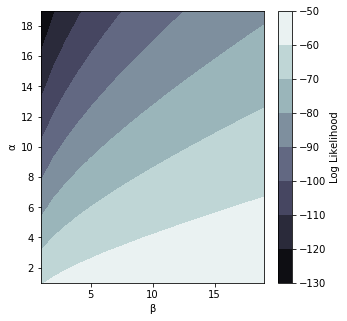

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,5))
CS = ax.contourf(X,Z, surface,cmap=plt.cm.bone)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Log Likelihood')
# Add the contour line levels to the colorbar
plt.xlabel("β")
plt.ylabel("α")
plt.show()